## Fit Gauß

- create 3D Gauß-Data
- create 3D changed Gauß-Date
- fit changed 3D Gauß-Data

Gauß für y-Achsen values

In [66]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy.random import randn, uniform
import numpy as np
from math import e

In [47]:
def gauss_func (x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2.)

In [48]:
def gauss_func_3D (x, y,  mu_x, sig_x, mu_y, sig_y):
    return np.multiply(gauss_func(x, mu_x, sig_x),gauss_func(y, mu_y, sig_y))

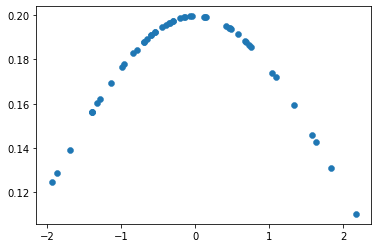

In [72]:
N = 50
x_w = np.array(randn(N),dtype=np.float32)
y_w = gauss_func(x_w, 0, 2)

ax = plt.axes()
ax.scatter(x_w, y_w, cmap='viridis', linewidth=0.5)

create 3D Gauß data

In [49]:
N = 1000
x_werte = np.array(randn(N),dtype=np.float32)
y_werte = np.array(randn(N),dtype=np.float32)
z_werte = gauss_func_3D(x_werte, y_werte,0, 1, 0, 1)

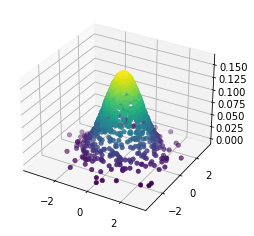

In [50]:
#plot 3D Gauß data
ax = plt.axes(projection='3d')
ax.scatter(x_werte, y_werte, z_werte, c=z_werte, cmap='viridis', linewidth=0.5)

create 3D changed Gauß-data

In [51]:
rng = np.random.default_rng()
z_noise = 0.01 * rng.normal(size=x_werte.size)
z_werte_noisy= z_werte + z_noise

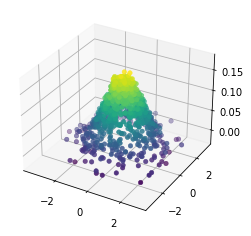

In [52]:
#plot 3D changed Gauß data
ax = plt.axes(projection='3d')
ax.scatter(x_werte, y_werte, z_werte_noisy, c=z_werte_noisy, cmap='viridis', linewidth=0.5)

fit 3D changed Gauß-data

In [53]:
#damit curve_fit nur ein independent variable object hat müssen x_werte und y_werte zu einem
#2D array zusammen geführt werden 

#zusammen führen von np.arrays
a = np.array((1,2,3))
b = np.array((2,3,4))
c = np.column_stack((a,b))
c

array([[1, 2],
       [2, 3],
       [3, 4]])

In [54]:
x_werte_y_werte = np.column_stack((x_werte,y_werte))
x_werte_y_werte

array([[-0.6520429 , -0.57150453],
       [-0.42494038,  0.08774697],
       [-0.07466729,  0.6534155 ],
       ...,
       [-1.5626323 , -1.2953771 ],
       [-1.1371957 , -0.8759516 ],
       [-0.6709214 ,  0.33775088]], dtype=float32)

In [55]:
#in de func fuction muss aus dem 2D wieder 1D gemacht werden 

#splitten von np.arrays column wise
d, e = np.hsplit(c, 2)
d,e 
f = e.flatten()
f

array([2, 3, 4])

In [56]:
def func(x_y,  mu_x, sig_x, mu_y, sig_y):
     x, y = np.hsplit(x_y, 2)
     return gauss_func_3D(x.flatten(),y.flatten(),mu_x,sig_x,mu_y,sig_y)


In [57]:
#test func
z_werte = func(x_werte_y_werte, 0, 1, 0, 1)
z_werte

array([0.10928833, 0.14485617, 0.12820296, 0.10310974, 0.07714956,
       0.14430124, 0.15169147, 0.1416373 , 0.11606232, 0.03575683,
       0.11113926, 0.02064594, 0.08217664, 0.04947492, 0.02935309,
       0.10116614, 0.01358025, 0.0636896 , 0.0018276 , 0.1389085 ,
       0.13502859, 0.10829145, 0.1515324 , 0.1585603 , 0.01369647,
       0.09213537, 0.01975173, 0.12977648, 0.14649116, 0.01874356,
       0.00410444, 0.0162777 , 0.15707488, 0.06077841, 0.00615096,
       0.09817269, 0.05722505, 0.02605725, 0.12193538, 0.1076232 ,
       0.00158443, 0.1147961 , 0.02611405, 0.09334864, 0.00987192,
       0.1151036 , 0.02163639, 0.06795834, 0.03357389, 0.03737406,
       0.00031441, 0.04313469, 0.005994  , 0.10303706, 0.08232655,
       0.08215678, 0.1523248 , 0.15415438, 0.06594724, 0.05812262,
       0.11958859, 0.11574776, 0.019669  , 0.06354984, 0.04844626,
       0.10623846, 0.02298634, 0.01253784, 0.13678123, 0.10880858,
       0.07324527, 0.13528857, 0.0339069 , 0.08772728, 0.00119

In [59]:
popt_bound, pcov = curve_fit(func, x_werte_y_werte, z_werte_noisy)
#new parameters
popt_bound

array([6.03364321e-04, 9.96338204e-01, 2.31645331e-04, 1.00408299e+00])

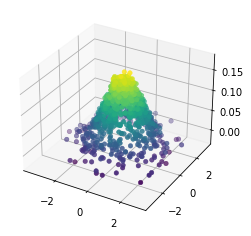

In [60]:
ax = plt.axes(projection='3d')
ax.scatter(x_werte, y_werte, z_werte_noisy, c=z_werte_noisy, cmap='viridis', linewidth=0.5)

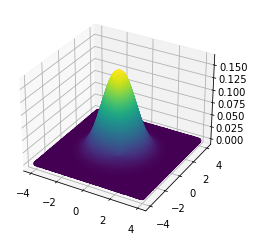

In [63]:
N = 100000
x_werte = np.array([uniform(-4, 4) for x in range(N)],dtype=np.float32)
y_werte = np.array([uniform(-4, 4) for x in range(N)],dtype=np.float32)


z_werte_fitted = gauss_func_3D(x_werte, y_werte, popt_bound[0], popt_bound[1], popt_bound[2], popt_bound[3])
ax = plt.axes(projection='3d')
ax.scatter(x_werte, y_werte, z_werte_fitted, c=z_werte_fitted, cmap='viridis', linewidth=0.5)